## Support Vector Regressor 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
#Create some synthetic data points 
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 0.68482135,  0.0717602 ],
       [ 0.25638655, -0.27943368],
       [-0.49458269,  0.09089687],
       ...,
       [-0.60629799, -0.15637914],
       [ 1.28808447, -0.96132736],
       [ 0.83751944, -2.02273458]])

In [6]:
y

array([ 6.19997861e+01,  1.71276449e+01, -4.46238299e+01,  1.22897686e+02,
        8.59109406e+01,  1.37964388e+02,  4.22106884e+00,  8.87076363e+01,
       -2.21407288e+01,  4.29356266e+01,  4.87158229e+01, -1.13612826e+02,
       -1.28801335e+02,  4.36321980e+01,  1.45724468e+01,  4.03191388e+00,
        1.73467091e+02, -2.93186137e+01,  2.41516019e+02, -6.97896540e+01,
        8.98486495e+01, -1.55211108e+01,  1.04450600e+02,  1.08665771e+02,
       -3.83919359e+01,  6.60838689e+01,  4.70912746e+00, -8.42490995e+01,
        2.05455713e+01, -1.19205947e+01, -1.44529491e+01,  4.83137899e+01,
       -1.65029816e+02,  1.24835150e+02, -2.92199286e+01,  3.35411122e+01,
        4.36607083e+01, -4.87933130e+01, -1.08258193e+02,  4.46773107e+01,
        1.02345600e+02,  1.37133516e+01, -1.18126142e+02, -2.79068241e+01,
        6.27238524e+01,  1.26188063e+02, -2.88353152e+01,  4.21880709e+01,
       -8.72871840e+01,  1.52014178e+02,  1.19181102e+02,  8.88812683e+01,
        1.67105695e+01,  

In [7]:
pd.DataFrame(X)[0]

0      0.684821
1      0.256387
2     -0.494583
3      1.450351
4      0.901502
         ...   
995    0.621485
996   -1.813038
997   -0.606298
998    1.288084
999    0.837519
Name: 0, Length: 1000, dtype: float64

<AxesSubplot:xlabel='0', ylabel='1'>

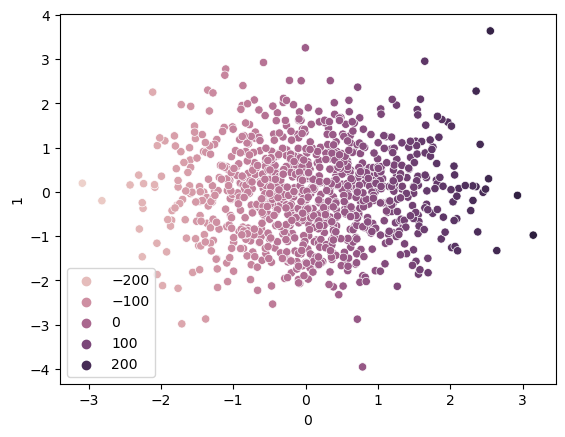

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVR

In [14]:
svr = SVR(kernel='linear')

In [15]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [16]:
svr.intercept_

array([0.29316946])

In [17]:
svr.coef_

array([[81.88843014,  5.79560639]])

In [18]:
y_pred = svr.predict(X_test)

In [19]:
from sklearn.metrics import r2_score

In [21]:
score = r2_score(y_pred,y_test)

In [22]:
score

0.9986020613933313

## Hypertunning parameters 

In [24]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [25]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [26]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.822 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.805 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.822 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.808 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [29]:
y_pred = grid.predict(X_test) 

In [32]:
score1 = r2_score(y_pred,y_test)

In [33]:
score1

0.9986303660331628